## 1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples. 

Anomaly detection is the process of identifying data points that do not follow the normal pattern in a dataset. These unusual points may indicate errors, fraud, faults, or rare events.

- **Types of anomalies:**

    - **Point Anomalies**
        - A single data point is very different from the rest.
Example: A transaction of 900000 in a dataset where most transactions are below 5000.

    - **Contextual Anomalies**  
        - A data point is normal in general but abnormal in a specific context.
Example: A temperature of 15°C is normal in winter but abnormal in summer.

    - **Collective Anomalies**
        - A group of related points becomes abnormal when seen together.
Example: A sudden long series of zero readings in a sensor may indicate device failure.

## 2.  Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of their approach and suitable use cases. 

1. **Isolation Forest**
    - Approach: Randomly isolates points by splitting features. Points that are isolated faster are marked as anomalies.
    - Use case: Large, high-dimensional numerical datasets. Works well for global anomalies.

2. **DBSCAN**
    - Approach: Groups dense regions together and marks low-density points as anomalies.
    - Use case: Spatial or 2D data, clusters with irregular shapes, noise detection.

3. **Local Outlier Factor (LOF)**
    - Approach: Compares local density of a point with its neighbors. Lower density indicates anomaly.
    - Use case: Detecting contextual or subtle local anomalies in small or medium datasets.

## 3. What are the key components of a Time Series? Explain each with one example.

A time series has four main components. Each shows a different pattern in the data over time.

- Trend
    - A long-term increase or decrease in the series.
    - Example: Monthly sales increasing slowly every year.

- Seasonality
    - A repeating pattern that occurs at fixed intervals.
    - Example: Ice cream sales rising every summer and falling every winter.

- Cyclic behavior
    - Patterns that rise and fall but not at fixed intervals.
    - Example: Economic cycles such as recession and recovery.

- Irregular or residual component
    - Random variation that cannot be explained by trend or seasonality.
    - Example: A sudden drop in sales due to a one-day store issue.

## 4. Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

A time series is called stationary when its statistical properties like mean, variance, and autocorrelation remain constant over time. Stationary data is important because most forecasting models work correctly only on stationary series.

- **How to test stationarity:**

1. Line plot
    - If the plot shows changing trend or seasonality, it is likely non-stationary.

2. Rolling statistics
    - Check if rolling mean and variance stay constant.

3. Augmented Dickey Fuller test
    - If p value is less than 0.05, the series is usually stationary.

- **How to make a series stationary:**

1. Differencing
    - Subtract the previous value from the current value.

2. Log transform
    - Reduces large variations.

3. Seasonal differencing
    - Removes repeating seasonal patterns.

4. Decomposition
    - Separate trend and seasonality from the data.

## 5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

These models are used to analyze and forecast time series data. Each model adds more components to handle trend, seasonality, or external features.

1. AR (Autoregressive model)
    - Uses past values of the series to predict future values.
    - Example: Predicting today’s temperature using previous temperatures.

2. MA (Moving Average model)
    - Uses past forecast errors to make predictions.
    - Example: Modeling noise or shocks in a time series.

3. ARIMA (Autoregressive Integrated Moving Average)
    - Combines AR and MA and adds differencing to make the series stationary.
    - Application: General forecasting when data has trend but no strong seasonality.

4. SARIMA (Seasonal ARIMA)
    - Extends ARIMA by adding seasonal AR, seasonal MA, and seasonal differencing.
    - Application: Data with clear seasonal patterns like monthly sales or monthly airline passengers.

5. SARIMAX (Seasonal ARIMA with Exogenous variables)
    - Adds external features to SARIMA.
    - Application: Forecasting when outside factors affect the series, such as weather, holidays, or economic indicators.

## 6. Load a time series dataset (AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

In [ ]:
%pip install pandas
%pip install matplotlib
%pip install statsmodels

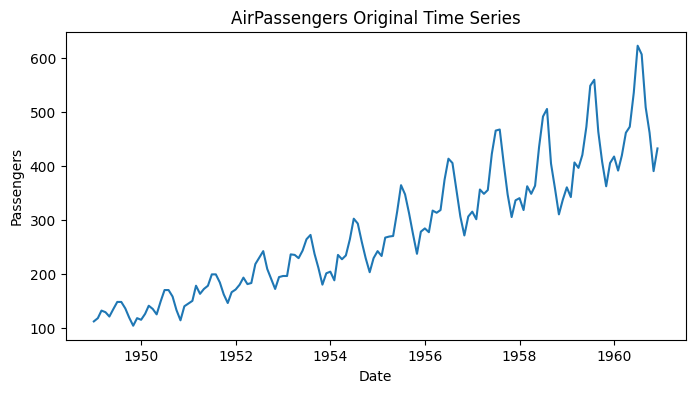

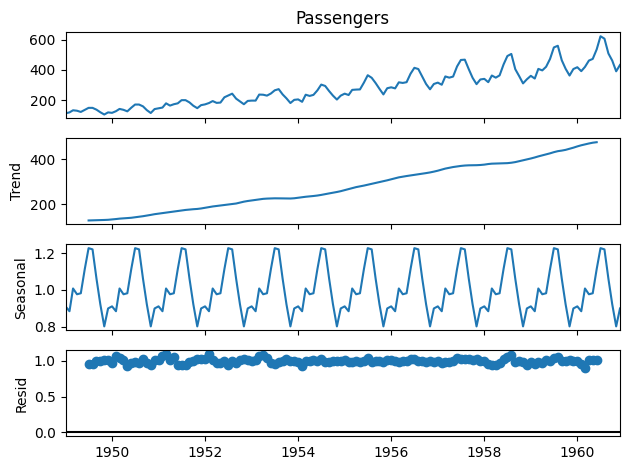

In [3]:
import pandas as pd   
import matplotlib.pyplot as plt     
from statsmodels.tsa.seasonal import seasonal_decompose    

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

plt.figure(figsize=(8,4))
plt.plot(data["Passengers"])
plt.title("AirPassengers Original Time Series")
plt.ylabel("Passengers")
plt.xlabel("Date")
plt.show()

# decompose the series
decomp = seasonal_decompose(data["Passengers"], model="multiplicative")

# plot decomposition
decomp.plot()
plt.tight_layout()
plt.show()


## 7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

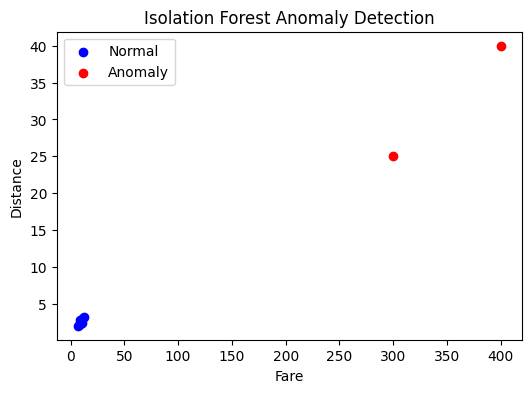

Detected anomalies:
    fare  distance  anomaly
5    300      25.0       -1
10   400      40.0       -1


In [5]:

import pandas as pd    
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest    

# create a small sample NYC taxi-like dataset
data = {
    "fare": [8, 10, 12, 9, 11, 300, 7, 13, 9, 10, 400],
    "distance": [2.1, 2.5, 3.0, 2.3, 2.4, 25, 2.0, 3.2, 2.8, 2.7, 40]
}
df = pd.DataFrame(data)

# apply Isolation Forest
model = IsolationForest(contamination=0.15, random_state=42)
df["anomaly"] = model.fit_predict(df[["fare", "distance"]])

# separate normal and anomaly points
normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

# plot results
plt.figure(figsize=(6,4))
plt.scatter(normal["fare"], normal["distance"], color="blue", label="Normal")
plt.scatter(anomaly["fare"], anomaly["distance"], color="red", label="Anomaly")
plt.xlabel("Fare")
plt.ylabel("Distance")
plt.title("Isolation Forest Anomaly Detection")
plt.legend()
plt.show()

# print anomalies
print("Detected anomalies:")
print(anomaly)


## 8.  Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results. 

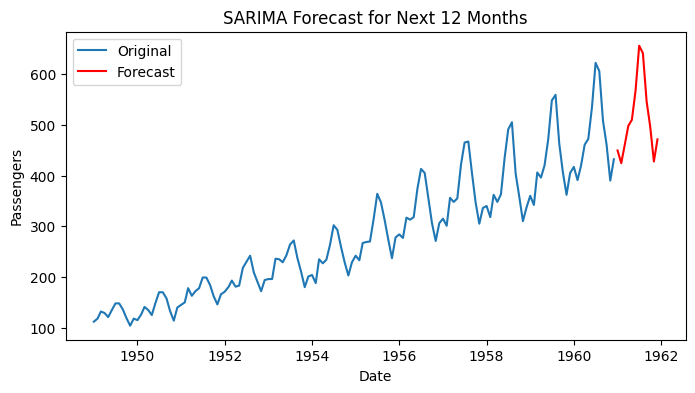

Forecasted values for next 12 months:
1961-01-01    449.330137
1961-02-01    424.386100
1961-03-01    459.032001
1961-04-01    497.864851
1961-05-01    509.862642
1961-06-01    568.258364
1961-07-01    655.810567
1961-08-01    641.190499
1961-09-01    546.392134
1961-10-01    496.800903
1961-11-01    427.673980
1961-12-01    471.235438
Freq: MS, Name: predicted_mean, dtype: float64


In [7]:
import pandas as pd     
import matplotlib.pyplot as plt   
from statsmodels.tsa.statespace.sarimax import SARIMAX 

import warnings
warnings.filterwarnings('ignore')

# load AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
data = pd.read_csv(url, parse_dates=["Month"], index_col="Month")

# define SARIMA model (seasonal monthly pattern)
model = SARIMAX(data["Passengers"], order=(1,1,1), seasonal_order=(1,1,1,12))
result = model.fit()

# forecast next 12 months
forecast = result.forecast(steps=12)

# plot original data and forecast
plt.figure(figsize=(8,4))
plt.plot(data["Passengers"], label="Original")
plt.plot(forecast, label="Forecast", color="red")
plt.title("SARIMA Forecast for Next 12 Months")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.show()

print("Forecasted values for next 12 months:")
print(forecast)



## 9.  Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib. 

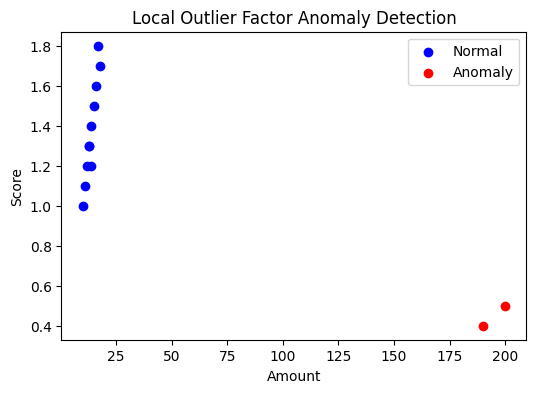

Detected anomalies:
    amount  score  anomaly
6      200    0.5       -1
10     190    0.4       -1


In [8]:
import pandas as pd      
import matplotlib.pyplot as plt     
from sklearn.neighbors import LocalOutlierFactor    

# create a sample numerical dataset
data = {
    "amount": [10, 12, 11, 13, 14, 15, 200, 16, 18, 17, 190, 14, 13],
    "score": [1, 1.2, 1.1, 1.3, 1.4, 1.5, 0.5, 1.6, 1.7, 1.8, 0.4, 1.2, 1.3]
}
df = pd.DataFrame(data)

# apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.15)
labels = lof.fit_predict(df)

# add labels to DataFrame
df["anomaly"] = labels

# separate normal and anomalies
normal = df[df["anomaly"] == 1]
anomaly = df[df["anomaly"] == -1]

# plot results
plt.figure(figsize=(6,4))
plt.scatter(normal["amount"], normal["score"], color="blue", label="Normal")
plt.scatter(anomaly["amount"], anomaly["score"], color="red", label="Anomaly")
plt.xlabel("Amount")
plt.ylabel("Score")
plt.title("Local Outlier Factor Anomaly Detection")
plt.legend()
plt.show()

print("Detected anomalies:")
print(anomaly)


## 10. You are working as a data scientist for a power grid monitoring company. 
Your goal is to forecast energy demand and also detect abnormal spikes or drops in 
real-time consumption data collected every 15 minutes. The dataset includes features 
like timestamp, region, weather conditions, and energy usage. 
Explain your real-time data science workflow: 
● How would you detect anomalies in this streaming data (Isolation Forest / LOF / 
DBSCAN)? 
● Which time series model would you use for short-term forecasting (ARIMA / 
SARIMA / SARIMAX)? 
● How would you validate and monitor the performance over time? 
● How would this solution help business decisions or operations?

A real-time workflow needs both anomaly detection and forecasting so that the system can react quickly to unusual patterns.

1. Detecting anomalies in streaming data
Isolation Forest or Local Outlier Factor can be used because they work well on numerical features and detect sudden abnormal values. In streaming data, the model is updated at regular intervals.
Example: Isolation Forest detects sudden spikes in energy usage caused by equipment faults.

2. Model for short-term forecasting
SARIMAX is suitable because it can include external features like temperature or humidity. These outside factors affect energy usage and help improve forecast accuracy.

3. Validation and monitoring
Use a rolling window to compare forecast values with actual values. Track error metrics such as MAE and RMSE. If errors increase, retrain the model or update parameters. Monitor anomaly counts to check for unusual patterns.

4. Business value
This system helps the company avoid overload, predict peak demand, and detect faults early. It improves energy distribution and reduces downtime.